# Real-world Data Wrangling

In [265]:
# !python -m pip install kaggle==1.6.12

In [266]:
## !pip install --target=/workspace ucimlrepo numpy==1.24.3

**Note:** Restart the kernel to use updated package(s).

In [268]:
import pandas as pd
import numpy as np
import requests

## 1. Gather data

### **1.1.** Problem Statement
In this project, we will investigate the educational attainment levels among individuals employed in computer-related occupations in King County, Washington, by gathering, cleaning, and analyzing relevant data to identify trends, distributions, and potential correlations within the local workforce

### **1.2.** Gathered U.S Bureau of Labor Statistics and U.S Census Bureau Dataset

#### **1.2.1** 2023 Occupational Employment and Wage (OEW) Statistics from U.S Bureau of Labor Statistics Dataset

Type: XLS file

Method: The data was gathered using the "Downloading files" method from U.S Bureau of Labor Statistics (Occupational Employment and Wage Statistics tables)

Dataset variables:

*   *AREA:* Area code
*   *AREA_TITLE:* Title of the metropolitan area
*   *OCC_CODE:* Occupational Code
*   *OCC_TITLE:* Occupational Title
*   *A_MEAN:* Mean Annual Wage

In [273]:
## Load OEW Dataset to access king county/seattle-tacoma area dataset
oew_data = pd.read_excel('oew_statistics_2023.xlsx')

In [274]:
## show the first 5 rows of dataset
oew_data.head(5)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,18.6,28.03,40.08,22750,28710,38680,58310,83360,NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,39.09,58.27,81.79,42080,59290,81310,121200,170130,NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,97.28,#,#,98490,135280,202340,#,#,NaN,NaN
3,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,37.19,57.85,86.97,34440,49430,77360,120330,180900,NaN,NaN
4,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,...,45.31,72.66,97.35,60130,74980,94240,151130,202490,NaN,NaN


#### **1.2.2** 2023 U.S Census Bureau Public Use Microdata Site (PUMS) Dataset - Custom Table

Type: API

Method: The data was gathered using the "API" method from the United States Census Bureau Public Use Microdata Sample site

Dataset variables:

*   *SOCP:* Standard Occupational Classification (SOC) codes for 2018 and later based oin 2018 SOC codes
*   *SCHL:* Educational Attainment
*   *SCHL_RC1:* Educational Attainment recode 

In [276]:
## Access PUMS API for census information for king county/seattle-tacoma dataset
url = 'https://api.census.gov/data/2023/acs/acs1/pums?get=PWGTP,SOCP,SCHL_RC1,SCHL&ucgid=795P200US5323304&recode+SCHL_RC1=%7B%22b%22:%22SCHL%22,%22d%22:%5B%5B%220%22,%2201%22,%2202%22,%2203%22,%2204%22,%2205%22,%2206%22,%2207%22,%2208%22,%2209%22,%2210%22,%2211%22,%2212%22,%2213%22,%2214%22,%2215%22%5D,%5B%2216%22,%2217%22%5D,%5B%2218%22,%2219%22%5D,%5B%2220%22,%2221%22%5D,%5B%2222%22,%2223%22,%2224%22%5D%5D%7D'
pums_response = requests.get(url)
pums_response.raise_for_status()

## Get the json
pums_response_data = pums_response.json()

## Create dataframe from json
pums_data = pd.DataFrame(pums_response_data)

In [277]:
## show the first 5 rows of dataset
print(pums_data.head(5))

       0       1         2     3      4      5
0  PWGTP    SOCP  SCHL_RC1  SCHL   PUMA  STATE
1     47       N         3    19  23304     53
2     74  537062         3    19  23304     53
3     54       N         4    21  23304     53
4     18       N         4    21  23304     53


Here's a summary of the issues discussed in the data assessment section, along with their types (quality or tidiness):

1. **Structural Issue - Unnecessary Columns**  
   - **Summary**: The dataset contains columns not required for the analysis, which need to be removed to reduce the dataset’s size.
   - **Type**: Tidiness

2. **Invalid Values in A_MEAN**  
   - **Summary**: The column "A_MEAN" contains invalid values ('*' and '#'), which need replacement to enable accurate calculations.
   - **Type**: Quality (Validity)

3. **Incorrect Data Type for A_MEAN**  
   - **Summary**: The "A_MEAN" column is incorrectly formatted as an object rather than a float, requiring conversion for accurate calculations.
   - **Type**: Quality (Completeness)

4. **Data Limited to Seattle-Tacoma-Washington**  
   - **Summary**: The dataset includes regions beyond Seattle-Tacoma-Washington, which need to be filtered out to focus only on the relevant area.
   - **Type**: Tidiness

5. **Focus on Computer-Related Occupations**  
   - **Summary**: Only computer-related occupation data is required; thus, non-computer-related occupations need to be filtered out.
   - **Type**: Tidiness

6. **Inconsistent Codes in OCC_CODE and SOCP**  
   - **Summary**: Codes in "OCC_CODE" (xx-xxxx) and "SOCP" (xxxxxx) have inconsistent formats, which need standardization for analysis.
   - **Type**: Quality (Consistency)

7. **Column Headers as Variables**  
   - **Summary**: Some columns are incorrectly serving as variables and need adjustment to enable straightforward access to data.
   - **Type**: Tidiness

8. **Invalid Data in SOCP Variable**  
   - **Summary**: The "SOCP" variable contains irrelevant values ('N') for the analysis context, which should be removed.
   - **Type**: Quality (Validity) 

Let me know if you need further details on any specific issue.

In [279]:
## Make copy of dataset before assessment and cleaning
oew_cleaned = oew_data.copy()

In [280]:
## visual assessments
oew_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149591 entries, 0 to 149590
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA          149591 non-null  int64  
 1   AREA_TITLE    149591 non-null  object 
 2   AREA_TYPE     149591 non-null  int64  
 3   PRIM_STATE    149591 non-null  object 
 4   NAICS         149591 non-null  int64  
 5   NAICS_TITLE   149591 non-null  object 
 6   I_GROUP       149591 non-null  object 
 7   OWN_CODE      149591 non-null  int64  
 8   OCC_CODE      149591 non-null  object 
 9   OCC_TITLE     149591 non-null  object 
 10  O_GROUP       149591 non-null  object 
 11  TOT_EMP       149591 non-null  object 
 12  EMP_PRSE      149591 non-null  object 
 13  JOBS_1000     149591 non-null  object 
 14  LOC_QUOTIENT  149591 non-null  object 
 15  PCT_TOTAL     0 non-null       float64
 16  PCT_RPT       0 non-null       float64
 17  H_MEAN        149591 non-null  object 
 18  A_ME

**Issue #1** Fix structural issue remove columns not needed for analysis
- Issue Assessment
  - State issue: Dataset has columns not need for analysis, reduce footprint to only needed columns
  - identification technique: visually
  - Issue type: Tidiness
  - Cleaning strategy - programmatically
  - Provide justification for issue
- cleaning
    - strategy: Drop unneccessary columns
    - verification: .sample(10) 

In [282]:
# Clean - Create subset of dataset needed for analysis
oew_cleaned = oew_cleaned[['AREA', 'OCC_CODE', 'OCC_TITLE', 'A_MEAN']].reindex()

# Verify - Inspecting the dataframe visually
oew_cleaned.head()

,AREA,OCC_CODE,OCC_TITLE,A_MEAN
0,10180,00-0000,All Occupations,49780
1,10180,11-0000,Management Occupations,100690
2,10180,11-1011,Chief Executives,240020
3,10180,11-1021,General and Operations Managers,98480
4,10180,11-2021,Marketing Managers,116290


**Issue #2** A_MEAN has invalid values in '*' & '#' 
- Issue Assessment
  - State issue: A_MEAN has invalid values in '*' & '#' 
  - identification technique: visually/programmatically .value_counts()
  - Issue type: quality- validity
  - Provide justification for issue: calculations/graphs with columns require replacement
- cleaning
    - strategy: Replace '*' & '#' with np.nan and convert column to float and drop the NA 
    - verification: .dtypes 

In [284]:
## assess the values in A_MEAN column for quality issues
oew_cleaned['A_MEAN'].value_counts()

A_MEAN
*         1487
#          144
54330       50
46110       48
40820       47
          ... 
207260       1
238120       1
193040       1
161570       1
295110       1
Name: count, Length: 15760, dtype: int64

In [285]:
# suppress warning
pd.set_option('future.no_silent_downcasting', True)

## clean - replace the * and # with np.nan
oew_cleaned['A_MEAN'] = oew_cleaned['A_MEAN'].replace(['*','#'], [np.nan, np.nan])

## drop NA values
oew_cleaned = oew_cleaned.dropna()

## verify cleaning
oew_cleaned['A_MEAN'].value_counts()

A_MEAN
54330     50
46110     48
40820     47
38380     47
47300     47
          ..
143790     1
158300     1
147040     1
118300     1
295110     1
Name: count, Length: 15758, dtype: int64

**Issue #3** A_MEAN datatype is object instead of float
- Issue Assessment
  - State issue: A_MEAN is object instead of float
  - identification technique: visually/programmatically .info()
  - Issue type: quality- completeness
  - Provide justification for issue: calculations/graphs with columns require conversion
- cleaning
    - strategy: .astype() to fix data type issue
    - verification: .dtypes 

In [287]:
## convert A_MEAN datatype to float
oew_cleaned['A_MEAN'].astype(float)

## verify data type conversion
oew_cleaned.dtypes

AREA          int64
OCC_CODE     object
OCC_TITLE    object
A_MEAN       object
dtype: object

**Issue #4** Seattle-Tacoma-Washington data only 
- Issue Assessment
  - State issue: We are only interested in analyzing Seattle-Tacoma-Washington data only and dataset has other areas
  - identification technique: visually assessment
  - Issue type: tidiness
  - Provide justification for issue: reduce dataset footprint
- cleaning
    - strategy: filter out non seattle related data
    - verification: check AREA unique count 

In [289]:
## check dataset for area code 42660 == seattle area
seattle_area = 42660
oew_cleaned[oew_cleaned['AREA'] != seattle_area].value_counts()

AREA   OCC_CODE  OCC_TITLE                                                                  A_MEAN
10180  00-0000   All Occupations                                                            49780     1
38540  49-3021   Automotive Body and Related Repairers                                      53720     1
       47-2152   Plumbers, Pipefitters, and Steamfitters                                    56080     1
       47-2181   Roofers                                                                    45980     1
       47-4011   Construction and Building Inspectors                                       61190     1
                                                                                                     ..
24340  33-9092   Lifeguards, Ski Patrol, and Other Recreational Protective Service Workers  28110     1
       33-9091   Crossing Guards and Flaggers                                               37530     1
       33-9032   Security Guards                                     

In [290]:
## Cleaning strategy: Filter out rows not relevant to analysis
seattle_area = 42660
oew_cleaned = oew_cleaned[oew_cleaned['AREA'] == seattle_area]

## Cleaning verification
assert oew_cleaned['AREA'].nunique() == 1

**Issue #5** computer-related occupations data only
- Issue Assessment
  - State issue: We are only interested in analyzing computer-related occupations data only
  - identification technique: visually assessment
  - Issue type: tidiness
  - Provide justification for issue: reduce dataset footprint
- cleaning
    - strategy: .astype() to fix data type issue
    - verification: .head()

In [292]:
## issue identification
oew_cleaned.head()

,AREA,OCC_CODE,OCC_TITLE,A_MEAN
118893,42660,00-0000,All Occupations,86520
118894,42660,11-0000,Management Occupations,174450
118895,42660,11-1011,Chief Executives,340720
118896,42660,11-1021,General and Operations Managers,157820
118897,42660,11-1031,Legislators,134310


In [293]:
## cleaning strategy: Filter out all other OCC_CODEs 
comsci_startwith = '15-'
oew_cleaned = oew_cleaned[ oew_cleaned['OCC_CODE'].str.startswith(comsci_startwith)]

In [294]:
## Cleaning verification
oew_cleaned.head()

,AREA,OCC_CODE,OCC_TITLE,A_MEAN
118962,42660,15-0000,Computer and Mathematical Occupations,144530
118963,42660,15-1211,Computer Systems Analysts,138410
118964,42660,15-1212,Information Security Analysts,154600
118965,42660,15-1221,Computer and Information Research Scientists,211410
118966,42660,15-1231,Computer Network Support Specialists,100650


**Issue #6** OCC_CODE (xx-xxxx) and SOCP (xxxxxx) code are in different formats
- Issue Assessment
  - State issue: We are only interested in analyzing computer-related occupations data only
  - identification technique: visually assessment
  - Issue type: consistency
  - Provide justification for issue: reduce dataset footprint
- cleaning
    - strategy: replace '-' in OCC_CODE column
    - verification: .head()

In [296]:
# Replace hyphen in OCC_CODE variable
oew_cleaned['OCC_CODE'] = oew_cleaned['OCC_CODE'].replace('-', '', regex=True)

# Cleaning verification
oew_cleaned.head()

,AREA,OCC_CODE,OCC_TITLE,A_MEAN
118962,42660,150000,Computer and Mathematical Occupations,144530
118963,42660,151211,Computer Systems Analysts,138410
118964,42660,151212,Information Security Analysts,154600
118965,42660,151221,Computer and Information Research Scientists,211410
118966,42660,151231,Computer Network Support Specialists,100650


## Assess Dataset 2 ## -- PUMS

In [298]:
## Make copy of dataset before assessment and cleaning
pums_data_copy = pums_data.copy()

In [299]:
### header is the first row of data 
print(pums_data_copy.head(5))

       0       1         2     3      4      5
0  PWGTP    SOCP  SCHL_RC1  SCHL   PUMA  STATE
1     47       N         3    19  23304     53
2     74  537062         3    19  23304     53
3     54       N         4    21  23304     53
4     18       N         4    21  23304     53


**Issue #7** columns headers are variables in the dataset
- Issue Assessment
  - State issue: columns headers are variables in the dataset
  - identification technique: programmatically
  - Issue type: tidiness
  - Provide justification for issue: fix for easy assess to column data
- cleaning
    - strategy: fix column headers and drop unneccessary columns
    - verification: .columns()

In [301]:
# Cleaning strategy - Fix issue with column headers
columns = pums_response_data[0]
rows = pums_response_data[1:]
pums_cleaned = pd.DataFrame(rows, columns=columns)

# drop PWTP/PUMA/STATE variables
pums_cleaned = pums_cleaned[['SOCP','SCHL_RC1', 'SCHL']].reindex()

# Cleaning verification
pums_cleaned.columns

Index(['SOCP', 'SCHL_RC1', 'SCHL'], dtype='object')

**Issue #8** invalid data in SOCP variable
- Issue Assessment
  - State issue: invalid data in SOCP variable
  - identification technique: programmatically
  - Issue type: Quality - Validity
  - Provide justification for issue: fix for easy assess to column data
- cleaning
    - strategy: remove the rows with SOCP value on 'N' they are not relevant in this context
    - verification: .columns()

In [303]:
## Issue invalid data in SOCP columns
pums_cleaned['SOCP'].describe()

count     1774
unique     218
top          N
freq       691
Name: SOCP, dtype: object

In [304]:
#cleaning strategy - remove the rows with SOCP value on 'N' they are not relevant in this context
pums_cleaned = pums_cleaned[pums_cleaned['SOCP'] != 'N']

#cleaning verification
assert((pums_cleaned['SOCP'] == 'N').sum() == 0)

**Issue #9** computer-related occupations data only
- Issue Assessment
  - State issue: We are only interested in analyzing computer-related occupations data only
  - identification technique: visually assessment
  - Issue type: tidiness
  - Provide justification for issue: reduce dataset footprint
- cleaning
    - strategy: filter in computer-related occupation data only
    - verification: .head()

In [306]:
## Filter for computer related roles only and drop everything else
pums_cleaned = pums_cleaned[pums_cleaned['SOCP'].str.contains(r'^15\d{4}$', case=False, regex=True)]

# cleaning verification
assert( pums_cleaned[~pums_cleaned['SOCP'].str.contains(r'^15\d{4}$', case=False, regex=True)].empty)

#### Combine datasets 
[EDIT BELOW]

We've cleaned the OEWS data. Now we can merge the `cleaned_pums` and `cleaned_wage` dataframes.

Drop the NA values and the unnecessary columns `Area_Title` which reports California for all values in the dataset. Drop the redundant `SOCP` variable. Finally reset the index after dropping the NA values.

*Note:* Here, we choose not to remove duplicate values - in the context of this problem statement, we value the individual counts to show the number of individuals in the sample belonging to a certain occupation (`OCC_TITLE`) / gender (`SEX`).

In [309]:
## Create lookup list for education level (ED_LEVEL)
ed_level_data = {
    'SCHL_RC1': ['1', '2', '3', '4', '5'],
    'ED_LEVEL': [
        'No high school diploma',    # SCHL_RC1 == 0
        'High school diploma',       # SCHL_RC1 == 1
        'Completed Some College',    # SCHL_RC1 == 2
        'Graduated College',         # SCHL_RC1 == 3
        'Completed Advance Degree'   # SCHL_RC1 == 4
    ]
}

ed_level_df = pd.DataFrame(ed_level_data)

# merge with pums dataset using SCHL_RC1 as key
pums_merged = pums_cleaned.merge(ed_level_df, on='SCHL_RC1', how='left')
pums_merged.head()

,SOCP,SCHL_RC1,SCHL,ED_LEVEL
0,151252,4,21,Graduated College
1,151252,4,21,Graduated College
2,151252,5,22,Completed Advance Degree
3,151252,5,22,Completed Advance Degree
4,151252,5,22,Completed Advance Degree


In [310]:
# merge oew with pums
merged_df = pums_merged.merge(oew_cleaned, left_on='SOCP', right_on='OCC_CODE', how='left')
merged_df.head(10)

,SOCP,SCHL_RC1,SCHL,ED_LEVEL,AREA,OCC_CODE,OCC_TITLE,A_MEAN
0,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130
1,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130
2,151252,5,22,Completed Advance Degree,42660.0,151252,Software Developers,164130
3,151252,5,22,Completed Advance Degree,42660.0,151252,Software Developers,164130
4,151252,5,22,Completed Advance Degree,42660.0,151252,Software Developers,164130
5,151252,5,22,Completed Advance Degree,42660.0,151252,Software Developers,164130
6,151252,5,22,Completed Advance Degree,42660.0,151252,Software Developers,164130
7,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130
8,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130
9,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130


<Axes: ylabel='ED_LEVEL'>

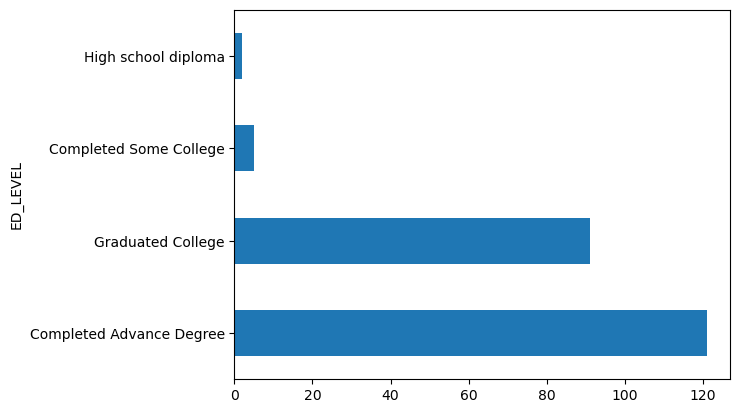

In [311]:
merged_df['ED_LEVEL'].value_counts().plot(kind='barh')

<Axes: xlabel='A_MEAN', ylabel='ED_LEVEL'>

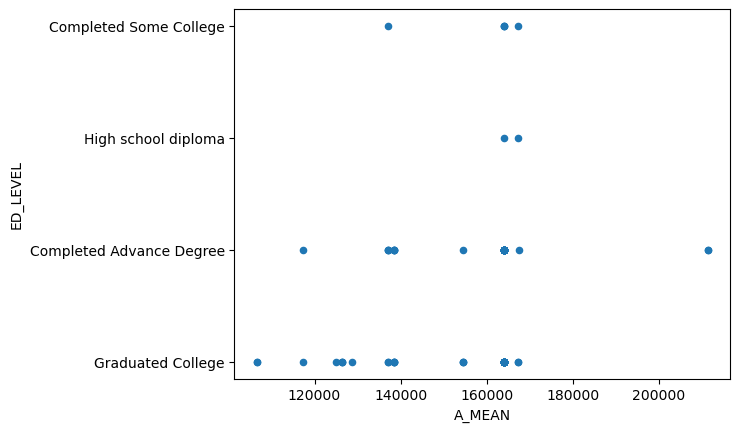

In [312]:
merged_df.plot(kind='scatter', y='ED_LEVEL', x='A_MEAN')

In [313]:
# Calculate and print the Pearson correlation coefficient
def calculate_correlation(df, x_column, y_column):
    pearson_cc = df[x_column].corr(df[y_column])
    print(f'Pearson Correlation Coefficient is {pearson_cc:.3f}')

In [314]:
calculate_correlation(merged_df, 'A_MEAN', 'SCHL_RC1')

Pearson Correlation Coefficient is 0.152


## 2. Assess data

Assessed the data according to data quality and tidiness metrics as reported below.

### Quality Issue 1: Invalid Values in A_MEAN Variable

In [317]:
#Inspecting dataframe for invalid characters in A_MEAN colums
oew_data.head(10)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,18.6,28.03,40.08,22750,28710,38680,58310,83360,NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,39.09,58.27,81.79,42080,59290,81310,121200,170130,NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,97.28,#,#,98490,135280,202340,#,#,NaN,NaN
3,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,37.19,57.85,86.97,34440,49430,77360,120330,180900,NaN,NaN
4,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,...,45.31,72.66,97.35,60130,74980,94240,151130,202490,NaN,NaN
5,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,...,44.89,62.57,87.76,46870,60760,93370,130140,182530,NaN,NaN
6,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2032,Public Relations Managers,...,35.61,46.71,62.93,55000,63680,74070,97160,130900,NaN,NaN
7,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3012,Administrative Services Managers,...,46.03,60.83,76.67,73650,82890,95750,126520,159470,NaN,NaN
8,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3013,Facilities Managers,...,37.82,48.31,63.42,57690,63890,78670,100480,131920,NaN,NaN
9,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3021,Computer and Information Systems Managers,...,63.29,79.7,98.19,67940,99750,131640,165770,204220,NaN,NaN


In [318]:
#Inspecting dataframe for invalid characters programmatically
oew_data['A_MEAN'].value_counts()

A_MEAN
*         1487
#          144
54330       50
46110       48
40820       47
          ... 
207260       1
238120       1
193040       1
161570       1
295110       1
Name: count, Length: 15760, dtype: int64

Issue and justification:
- **Issue**: Invalid Values in A_MEAN
- **Explanation**: Presence of invalid characters (‘*’ and ‘#’) in numerical fields affects data’s validity.

### Quality Issue 2: Incorrect Data Type for A_MEAN

In [321]:
#Inspecting dataframe for invalid data type for A_MEAN
oew_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149591 entries, 0 to 149590
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA          149591 non-null  int64  
 1   AREA_TITLE    149591 non-null  object 
 2   AREA_TYPE     149591 non-null  int64  
 3   PRIM_STATE    149591 non-null  object 
 4   NAICS         149591 non-null  int64  
 5   NAICS_TITLE   149591 non-null  object 
 6   I_GROUP       149591 non-null  object 
 7   OWN_CODE      149591 non-null  int64  
 8   OCC_CODE      149591 non-null  object 
 9   OCC_TITLE     149591 non-null  object 
 10  O_GROUP       149591 non-null  object 
 11  TOT_EMP       149591 non-null  object 
 12  EMP_PRSE      149591 non-null  object 
 13  JOBS_1000     149591 non-null  object 
 14  LOC_QUOTIENT  149591 non-null  object 
 15  PCT_TOTAL     0 non-null       float64
 16  PCT_RPT       0 non-null       float64
 17  H_MEAN        149591 non-null  object 
 18  A_ME

In [322]:
#Inspecting dataframe for invalid data type for A_MEAN programmatically
oew_data.dtypes

AREA              int64
AREA_TITLE       object
AREA_TYPE         int64
PRIM_STATE       object
NAICS             int64
NAICS_TITLE      object
I_GROUP          object
OWN_CODE          int64
OCC_CODE         object
OCC_TITLE        object
O_GROUP          object
TOT_EMP          object
EMP_PRSE         object
JOBS_1000        object
LOC_QUOTIENT     object
PCT_TOTAL       float64
PCT_RPT         float64
H_MEAN           object
A_MEAN           object
MEAN_PRSE        object
H_PCT10          object
H_PCT25          object
H_MEDIAN         object
H_PCT75          object
H_PCT90          object
A_PCT10          object
A_PCT25          object
A_MEDIAN         object
A_PCT75          object
A_PCT90          object
ANNUAL           object
HOURLY           object
dtype: object

Issue and justification:
- **Issue**: Incorrect Data Type for A_MEAN 
- **Explanation**: Incorrect data type is a validity issue as it prevents numerical operations; completeness typically refers to missing data rather than incorrect types

### Tidiness Issue 1: Structural Issue - Unnecessary Columns in OEW Dataset

In [325]:
# Inspecting the dataframe visually
oew_data.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [326]:
#Inspecting the dataframe programmatically
oew_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149591 entries, 0 to 149590
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA          149591 non-null  int64  
 1   AREA_TITLE    149591 non-null  object 
 2   AREA_TYPE     149591 non-null  int64  
 3   PRIM_STATE    149591 non-null  object 
 4   NAICS         149591 non-null  int64  
 5   NAICS_TITLE   149591 non-null  object 
 6   I_GROUP       149591 non-null  object 
 7   OWN_CODE      149591 non-null  int64  
 8   OCC_CODE      149591 non-null  object 
 9   OCC_TITLE     149591 non-null  object 
 10  O_GROUP       149591 non-null  object 
 11  TOT_EMP       149591 non-null  object 
 12  EMP_PRSE      149591 non-null  object 
 13  JOBS_1000     149591 non-null  object 
 14  LOC_QUOTIENT  149591 non-null  object 
 15  PCT_TOTAL     0 non-null       float64
 16  PCT_RPT       0 non-null       float64
 17  H_MEAN        149591 non-null  object 
 18  A_ME

Issue and justification:
- **Issue**: Structural Issue - Unnecessary Columns 
- **Explanation**: Tidiness issues relate to the structure, and unnecessary columns are removed to maintain a clean structure.

### Tidiness Issue 2: Column Headers as Variables in PUMS Dataset

In [329]:
# Inspecting the dataframe visually
pums_data.head(5)

,0,1,2,3,4,5
0,PWGTP,SOCP,SCHL_RC1,SCHL,PUMA,STATE
1,47,N,3,19,23304,53
2,74,537062,3,19,23304,53
3,54,N,4,21,23304,53
4,18,N,4,21,23304,53


In [330]:
#Inspecting the dataframe programmatically
pums_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1775 non-null   object
 1   1       1775 non-null   object
 2   2       1775 non-null   object
 3   3       1775 non-null   object
 4   4       1775 non-null   object
 5   5       1775 non-null   object
dtypes: object(6)
memory usage: 83.3+ KB


Issue and justification: 
- **Issue**: Column Headers as Variables
- **Explanation**: Columns acting as variables violate tidy data principles, thus categorizing it as a tidiness issue.

## 3. Clean data
- Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step.
- **Make sure you include justifications for your cleaning decisions.**
-  please use **either** the visually or programatical method to validate the cleaning was succesful.


At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [394]:
## Make copy of dataset before cleaning
oew_cleaned = oew_data.copy()
pums_data_copy = pums_data.copy()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,18.6,28.03,40.08,22750,28710,38680,58310,83360,NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,39.09,58.27,81.79,42080,59290,81310,121200,170130,NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,97.28,#,#,98490,135280,202340,#,#,NaN,NaN
3,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,37.19,57.85,86.97,34440,49430,77360,120330,180900,NaN,NaN
4,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,...,45.31,72.66,97.35,60130,74980,94240,151130,202490,NaN,NaN


### **Quality Issue 1: Invalid Values in A_MEAN Variable**

In [396]:
# suppress warning
pd.set_option('future.no_silent_downcasting', True)

## clean - replace the * and # with np.nan
oew_cleaned['A_MEAN'] = oew_cleaned['A_MEAN'].replace(['*','#'], [np.nan, np.nan])

## drop NA values
#oew_cleaned = oew_cleaned.dropna()

In [398]:
## verify cleaning
oew_cleaned['A_MEAN'].value_counts()

A_MEAN
54330     50
46110     48
40820     47
38380     47
47300     47
          ..
143790     1
158300     1
147040     1
118300     1
295110     1
Name: count, Length: 15758, dtype: int64

Justification: 
- The column "A_MEAN" contains invalid values ('*' and '#') replacing with np.nan allows for the rows with those values to be dropped with dropna

### **Quality Issue 2: Incorrect Data Type for A_MEAN**

In [400]:
## convert A_MEAN datatype to float
oew_cleaned['A_MEAN'] = oew_cleaned['A_MEAN'].astype('float')

In [402]:
## verify data type conversion
oew_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149591 entries, 0 to 149590
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA          149591 non-null  int64  
 1   AREA_TITLE    149591 non-null  object 
 2   AREA_TYPE     149591 non-null  int64  
 3   PRIM_STATE    149591 non-null  object 
 4   NAICS         149591 non-null  int64  
 5   NAICS_TITLE   149591 non-null  object 
 6   I_GROUP       149591 non-null  object 
 7   OWN_CODE      149591 non-null  int64  
 8   OCC_CODE      149591 non-null  object 
 9   OCC_TITLE     149591 non-null  object 
 10  O_GROUP       149591 non-null  object 
 11  TOT_EMP       149591 non-null  object 
 12  EMP_PRSE      149591 non-null  object 
 13  JOBS_1000     149591 non-null  object 
 14  LOC_QUOTIENT  149591 non-null  object 
 15  PCT_TOTAL     0 non-null       float64
 16  PCT_RPT       0 non-null       float64
 17  H_MEAN        149591 non-null  object 
 18  A_ME

Justification: 
- *For calculation accuracy coverting A_MEAN to float from object*

### **Tidiness Issue 1: Structural Issue - Unnecessary Columns in OEW Dataset**

In [406]:
# Clean - Create subset of dataset needed for analysis
oew_cleaned = oew_cleaned[['AREA', 'OCC_CODE', 'OCC_TITLE', 'A_MEAN']].reindex()

In [408]:
# Verify - Inspecting the dataframe visually
oew_cleaned.head()

,AREA,OCC_CODE,OCC_TITLE,A_MEAN
0,10180,00-0000,All Occupations,49780.0
1,10180,11-0000,Management Occupations,100690.0
2,10180,11-1011,Chief Executives,240020.0
3,10180,11-1021,General and Operations Managers,98480.0
4,10180,11-2021,Marketing Managers,116290.0


Justification: 
- *Reduced the columns to just those needed for analysis*

### **Tidiness Issue 2: Column Headers as Variables in PUMS Dataset**

In [412]:
# Cleaning strategy - Fix issue with column headers
columns = pums_response_data[0]
rows = pums_response_data[1:]
pums_cleaned = pd.DataFrame(rows, columns=columns)

# drop PWTP/PUMA/STATE variables
pums_cleaned = pums_cleaned[['SOCP','SCHL_RC1', 'SCHL']].reindex()

In [70]:
# Cleaning verification
pums_cleaned.columns

Justification: 
- *Easier to programmatically use column names rather than column id or number*

### **Remove unnecessary variables and combine datasets**

#### **Remove unnecessary variables** ###

In [418]:
# Limit OEW dataset to Computer related occupations in the Seattle-Tacoma-Washington area only
seattle_area = 42660
oew_cleaned = oew_cleaned[oew_cleaned['AREA'] == seattle_area]
assert oew_cleaned['AREA'].nunique() == 1

In [423]:
# Limit OEW dataset to Computer related occupations 
comsci_startswith = '15-'
oew_cleaned = oew_cleaned[ oew_cleaned['OCC_CODE'].str.startswith(comsci_startswith)]
assert(oew_cleaned[~oew_cleaned['OCC_CODE'].str.startswith(comsci_startswith)].empty)

In [ ]:
## Limit PUMS dataset Computer-Related Occupations only
pums_cleaned = pums_cleaned[pums_cleaned['SOCP'].str.contains(r'^15\d{4}$', case=False, regex=True)]
assert( pums_cleaned[~pums_cleaned['SOCP'].str.contains(r'^15\d{4}$', case=False, regex=True)].empty)

In [ ]:
# Remove invalid Data in SOCP ( == 'N' ) Variable that is not relevant in this context
pums_cleaned = pums_cleaned[pums_cleaned['SOCP'] != 'N']

#### **Combine Dataset** ####

In [ ]:
## Create lookup list for education level (ED_LEVEL)
ed_level_data = {
    'SCHL_RC1': ['1', '2', '3', '4', '5'],
    'ED_LEVEL': [
        'No high school diploma',    # SCHL_RC1 == 0
        'High school diploma',       # SCHL_RC1 == 1
        'Completed Some College',    # SCHL_RC1 == 2
        'Graduated College',         # SCHL_RC1 == 3
        'Completed Advance Degree'   # SCHL_RC1 == 4
    ]
}

ed_level_df = pd.DataFrame(ed_level_data)

# merge with pums dataset using SCHL_RC1 as key
pums_merged = pums_cleaned.merge(ed_level_df, on='SCHL_RC1', how='left')
pums_merged.head()

In [ ]:
# merge oew and pums
merged_df = pums_merged.merge(oew_cleaned, left_on='SOCP', right_on='OCC_CODE', how='left')
merged_df.head(10)

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [75]:
#FILL IN - saving data
merged_df.to_csv('pums_oews_2024_compsci_edlevel.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

In [78]:
#Visual 1 - FILL IN

*Answer to research question:* FILL IN

In [80]:
#Visual 2 - FILL IN

*Answer to research question:* FILL IN

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN